In [844]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import datetime


# FOLDER = 'softwaresausageparty' # 18,020
FOLDER = 'newclub'
# FOLDER = 'theincredibles'
# FOLDER = 'alishajaynewood'
# FOLDER = 'serenachern'
# FOLDER = 'abunchofhornyteens' # 42,000
# FOLDER = 'thewildboys'
# FOLDER = 'gregorymaxim'

### Generate core json

In [845]:
jsons = []
for file in glob('files/' + FOLDER + '*/*.json'):
    jsons.append(json.load(open(file)))

### Generate frequency on date
Since I'm just going to use matplotlib, it's easier to just use plain python

In [846]:
tz = datetime.timezone(datetime.timedelta(hours=10)) # AEST, because most of the chat log would be aest
date_to_user_to_frequency = {}
datetime_to_epoch = {}

message_count = 0
for json in jsons:
    for message in json['messages']:
        if 'content' not in message:
            continue
        user = message['sender_name']
        timestamp = int(message['timestamp_ms']) / 1000
        content = message['content']
        message_count += 1

        date = datetime.datetime.fromtimestamp(timestamp, tz).date()
        if date in datetime_to_epoch:
            datetime_to_epoch[date].append(timestamp)
        else:
            datetime_to_epoch[date] = [timestamp]


        if date not in date_to_user_to_frequency:
            date_to_user_to_frequency[date] = {}

        if user in date_to_user_to_frequency[date]:
            # word_count = len(content.split())
            # date_to_user_to_frequency[date][user] += word_count
            date_to_user_to_frequency[date][user] += 1
        else:
            # word_count = len(content.split())
            # date_to_user_to_frequency[date][user] = word_count
            date_to_user_to_frequency[date][user] = 1

print(message_count)
print(len(date_to_user_to_frequency))

177830
1031


In [847]:
participants_list = set()
for json in jsons:
    for msg in json['messages']:
        participants_list.add(msg['sender_name'])

print(participants_list)

{'Ethan Lewis', 'William Dower', 'Nicolaas van der Merwe'}


### Highest message count on a day

In [848]:
max_messages = 0
max_date = None
for key, val in date_to_user_to_frequency.items():
    day_count = 0
    for val2 in val.values():
        day_count += val2

    if day_count > max_messages:
        max_date = key
        max_messages = day_count

print(max_date, date_to_user_to_frequency[max_date])

2021-09-28 {'Ethan Lewis': 593, 'Nicolaas van der Merwe': 686, 'William Dower': 9}


### Most message days

In [849]:
date_to_frequency = []
print(sorted(datetime_to_epoch[max_date]))

for key, val in date_to_user_to_frequency.items():
    day_count = 0
    for val2 in val.values():
        day_count += val2

    date_to_frequency.append([key, day_count])

value_sorted_d2f = sorted(date_to_frequency, key = lambda x : x[1], reverse=True)
date_sorted_d2f = sorted(date_to_frequency, key = lambda x : x[0])
print(value_sorted_d2f[0:10])
print(date_sorted_d2f[0:10])

[1632785675.715, 1632785724.996, 1632785869.487, 1632786188.597, 1632791594.04, 1632791598.194, 1632791648.01, 1632791648.201, 1632791657.72, 1632791688.057, 1632791701.399, 1632791703.261, 1632791704.511, 1632791724.681, 1632791731.584, 1632791754.497, 1632791811.461, 1632791820.982, 1632791824.87, 1632791830.722, 1632791925.476, 1632791939.06, 1632791948.554, 1632791954.19, 1632791965.66, 1632791980.59, 1632791984.741, 1632791997.723, 1632792013.941, 1632792027.518, 1632792028.913, 1632792070.445, 1632792083.702, 1632792101.05, 1632792107.595, 1632792128.944, 1632792141.255, 1632792184.632, 1632792192.196, 1632792194.953, 1632792205.22, 1632792209.28, 1632792220.996, 1632792232.313, 1632792262.999, 1632792266.154, 1632792284.58, 1632792291.209, 1632792295.723, 1632792301.92, 1632792315.964, 1632792325.782, 1632792329.495, 1632792334.846, 1632792335.608, 1632792336.297, 1632792346.031, 1632792352.555, 1632792356.753, 1632792369.884, 1632792377.344, 1632792385.822, 1632792386.961, 1632

In [850]:
count = 0
for d2f in value_sorted_d2f:
    print(d2f[1], ":", d2f[0], date_to_user_to_frequency[d2f[0]])
    count += 1
    if count > 20:
        break

1288 : 2021-09-28 {'Ethan Lewis': 593, 'Nicolaas van der Merwe': 686, 'William Dower': 9}
1230 : 2020-06-05 {'Ethan Lewis': 376, 'Nicolaas van der Merwe': 614, 'William Dower': 240}
1184 : 2020-10-15 {'Nicolaas van der Merwe': 563, 'William Dower': 70, 'Ethan Lewis': 551}
1163 : 2021-10-01 {'Ethan Lewis': 473, 'Nicolaas van der Merwe': 661, 'William Dower': 29}
1135 : 2020-09-10 {'Nicolaas van der Merwe': 554, 'William Dower': 247, 'Ethan Lewis': 334}
1129 : 2021-04-26 {'Ethan Lewis': 515, 'Nicolaas van der Merwe': 614}
1121 : 2021-06-10 {'Nicolaas van der Merwe': 655, 'Ethan Lewis': 464, 'William Dower': 2}
1118 : 2021-10-08 {'Ethan Lewis': 514, 'Nicolaas van der Merwe': 549, 'William Dower': 55}
1081 : 2020-10-07 {'Nicolaas van der Merwe': 450, 'Ethan Lewis': 402, 'William Dower': 229}
1041 : 2020-10-06 {'William Dower': 282, 'Ethan Lewis': 381, 'Nicolaas van der Merwe': 378}
1014 : 2021-06-19 {'Ethan Lewis': 377, 'Nicolaas van der Merwe': 589, 'William Dower': 48}
1002 : 2020-08-05 

[datetime.date(2019, 5, 17), datetime.date(2019, 5, 30), datetime.date(2019, 5, 31), datetime.date(2019, 6, 1), datetime.date(2019, 6, 5), datetime.date(2019, 6, 7), datetime.date(2019, 6, 10), datetime.date(2019, 6, 13), datetime.date(2019, 6, 15), datetime.date(2019, 6, 19), datetime.date(2019, 7, 12), datetime.date(2019, 7, 13), datetime.date(2019, 7, 14), datetime.date(2019, 7, 19), datetime.date(2019, 7, 22), datetime.date(2019, 7, 23), datetime.date(2019, 7, 24), datetime.date(2019, 7, 26), datetime.date(2019, 7, 27), datetime.date(2019, 7, 28), datetime.date(2019, 7, 29), datetime.date(2019, 7, 30), datetime.date(2019, 7, 31), datetime.date(2019, 8, 1), datetime.date(2019, 8, 3), datetime.date(2019, 8, 4), datetime.date(2019, 8, 5), datetime.date(2019, 8, 6), datetime.date(2019, 8, 7), datetime.date(2019, 8, 8), datetime.date(2019, 8, 10), datetime.date(2019, 8, 11), datetime.date(2019, 8, 12), datetime.date(2019, 8, 13), datetime.date(2019, 8, 14), datetime.date(2019, 8, 15), d

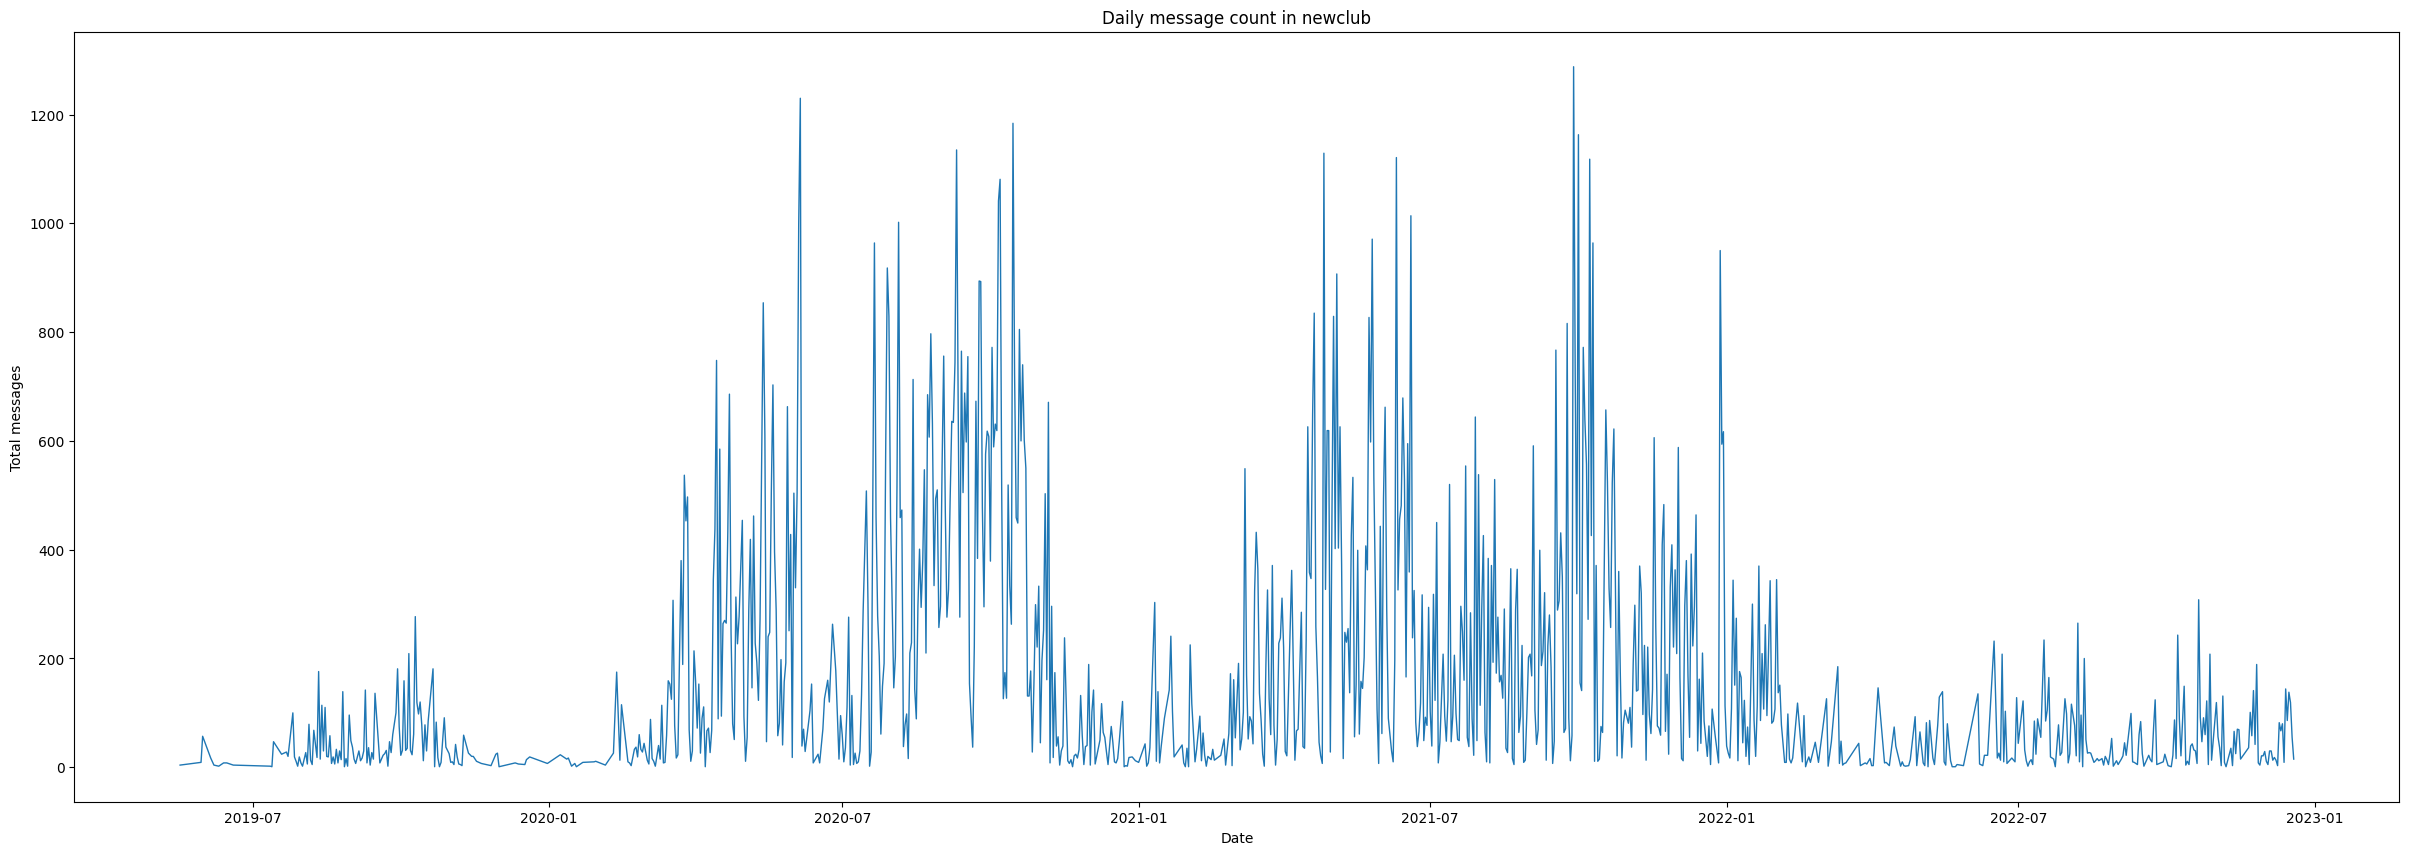

In [851]:
dates, counts = map(list, zip(*date_sorted_d2f))
print(dates[0:100])
plt.figure(figsize=(30, 10))
plt.title("Daily message count in " + FOLDER)
plt.xlabel("Date")
plt.ylabel("Total messages")
plt.plot(dates, counts, linewidth=1)
plt.show()

In [852]:
window = 10
average_count = []
for ind in range(len(counts) - window + 1):
    average_count.append(np.mean(counts[ind:ind+window]))

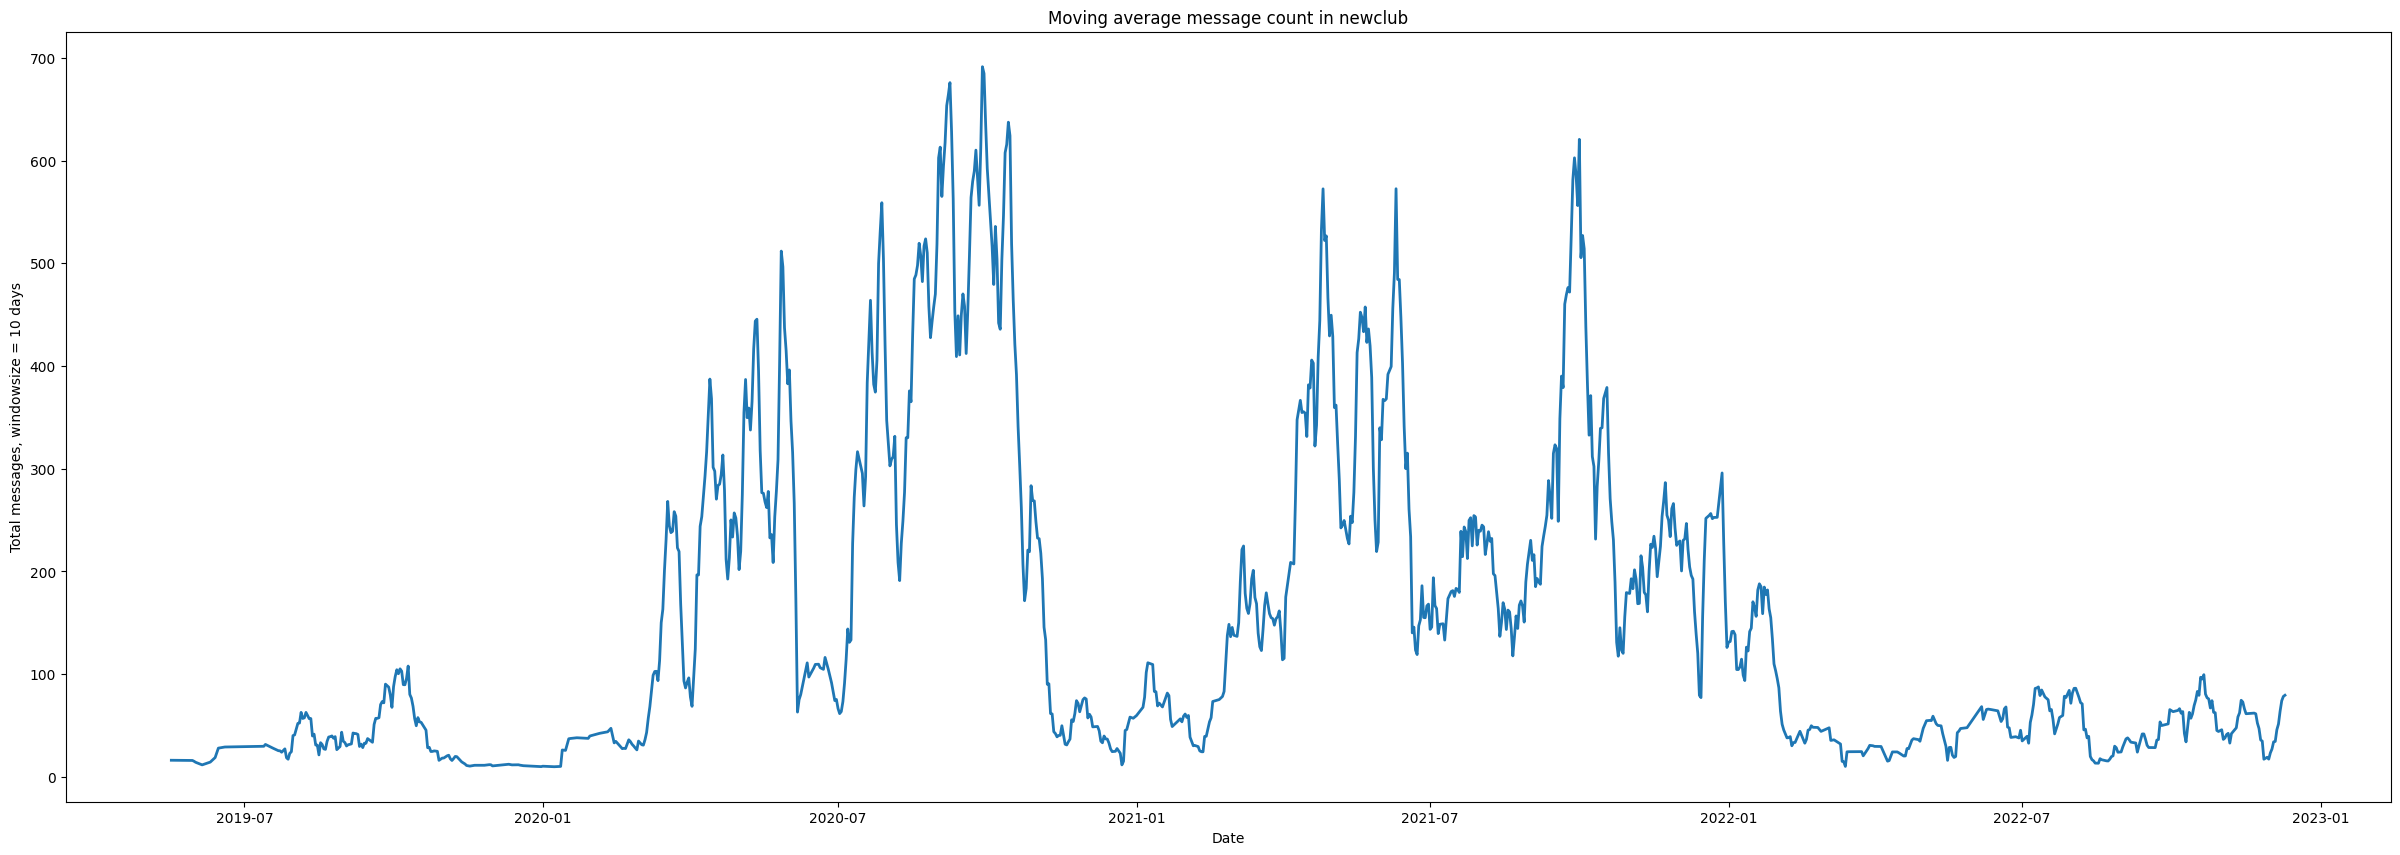

In [853]:
plt.figure(figsize=(30, 10))
plt.title("Moving average message count in " + FOLDER)
plt.xlabel("Date")
plt.ylabel("Total messages, windowsize = 10 days")
plt.plot(dates[0:len(average_count)], average_count, linewidth=2)
plt.show()

In [854]:
dates = []
users_counts = {}

for key, val in sorted(date_to_user_to_frequency.items()):
    dates.append(key)

    for user, freq in val.items():
        if user not in users_counts:
            users_counts[user] = []
        users_counts[user].append(freq)

    for missing_user in set(val.keys()).symmetric_difference(set(participants_list)):
        if missing_user not in users_counts:
            users_counts[missing_user] = []
        users_counts[missing_user].append(0)

In [855]:
for v, k in users_counts.items():
    print(v, len(k))

Nicolaas van der Merwe 1031
Ethan Lewis 1031
William Dower 1031


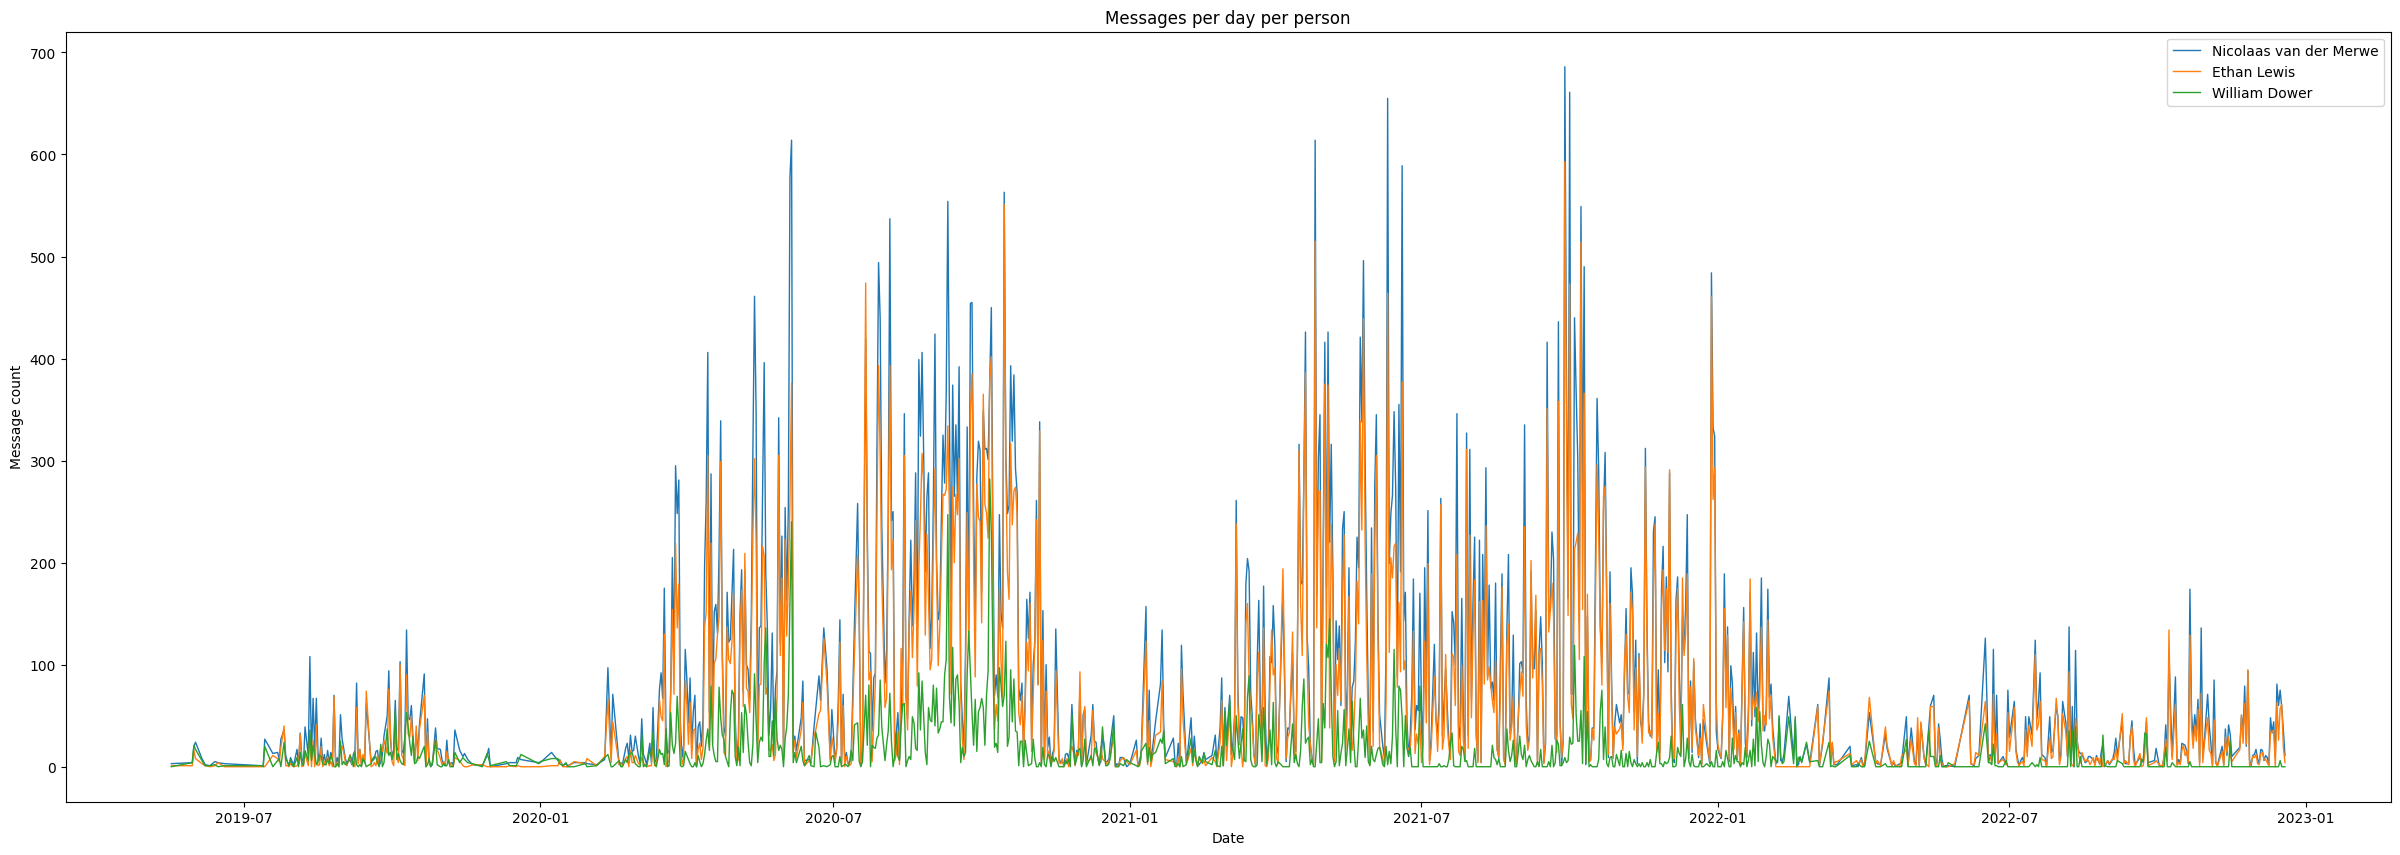

In [856]:
plt.figure(figsize=(30, 10))
plt.title("Messages per day per person")
plt.xlabel("Date")
plt.ylabel("Message count")

for user, freqs in users_counts.items():
    plt.plot(dates, freqs, label=user, linewidth=1)


plt.legend()
plt.savefig("Raw numbers.png")

In [857]:
window = 10
users_moving_average = {}

for u, c in users_counts.items():
    if u not in users_moving_average:
        users_moving_average[u] = []

    for ind in range(len(counts) - window + 1):
        users_moving_average[u].append(np.mean(users_counts[u][ind:ind+window]))


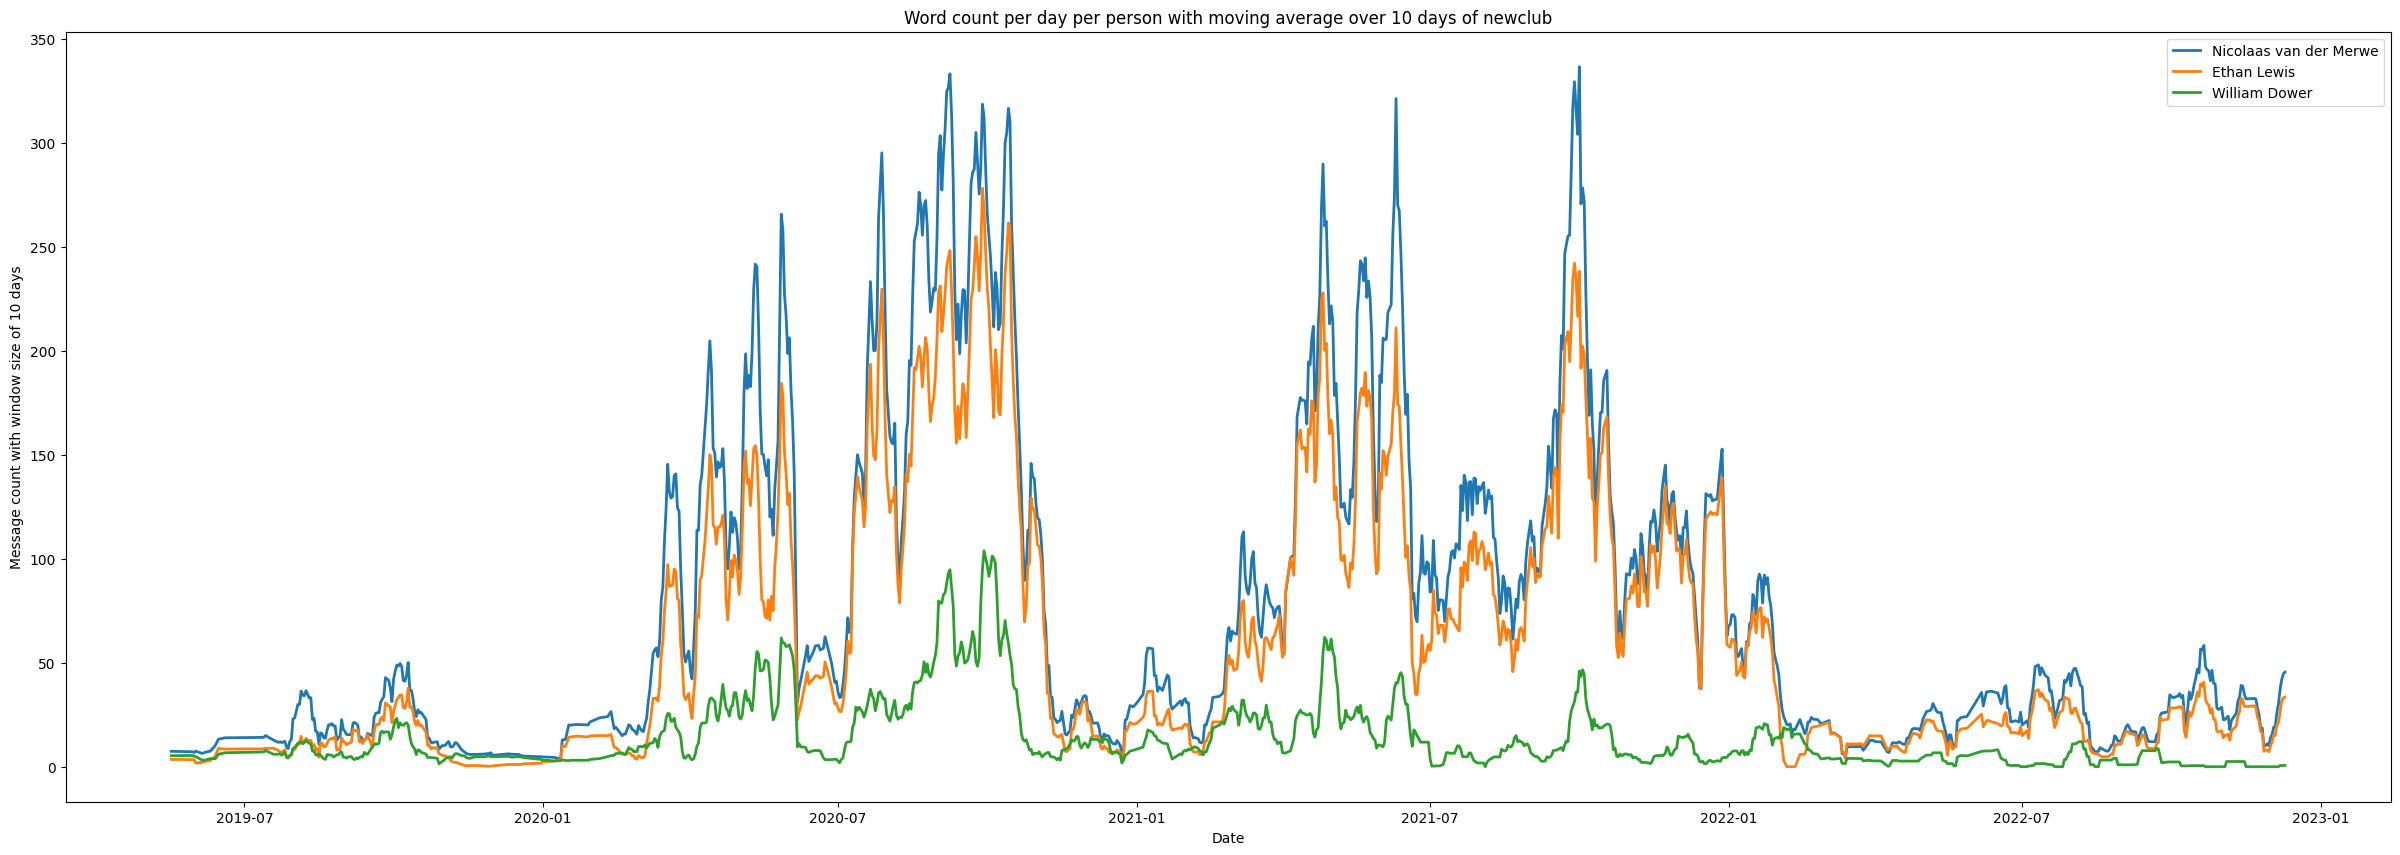

In [858]:
plt.figure(figsize=(30, 10))
plt.title("Word count per day per person with moving average over " + str(window) + " days of " + FOLDER)
plt.xlabel("Date")
plt.ylabel("Message count with window size of " + str(window) + " days")

for user, freqs in users_moving_average.items():
    plt.plot(dates[0:len(freqs)], freqs, label=user, linewidth=2)


plt.legend()
plt.savefig("10 day Moving average.png")

### Top count per person per day

In [859]:
# dates = []
# users_counts = {}

user_max_days = []
for u in users_counts.keys():
    max_messages = 0
    max_date = None
    for index in range(len(dates[0:len(users_counts[u])])):
        if u not in date_to_user_to_frequency[dates[index]]:
            continue
        day_count = date_to_user_to_frequency[dates[index]][u]

        if day_count > max_messages:
            max_date = dates[index]
            max_messages = day_count

    user_max_days.append([date_to_user_to_frequency[max_date][u], max_date, u])

sorted_umd = sorted(user_max_days, key = lambda x : x[0], reverse=True)
print("Highest single day word counts per user")
for s in sorted_umd:
    print("Freq=" + str(s[0]) + "  Date=" + str(s[1]) + "  user=" + str(s[2]))

Highest single day word counts per user
Freq=686  Date=2021-09-28  user=Nicolaas van der Merwe
Freq=593  Date=2021-09-28  user=Ethan Lewis
Freq=282  Date=2020-10-06  user=William Dower


In [860]:
total_count_per_user = []
for u, c in users_counts.items():
    total_count_per_user.append([u, np.sum(c)])

sorted_tcpu = sorted(total_count_per_user, key = lambda x : x[1], reverse=True)
print("Total words per person")
for s in sorted_tcpu:
    print("Freq=" + str(s[1]) + "  user=" + str(s[0]))

Total words per person
Freq=91670  user=Nicolaas van der Merwe
Freq=70399  user=Ethan Lewis
Freq=15761  user=William Dower


### Longest single messages

In [861]:
user_to_longest_message = {}

for json in jsons:
    for message in json['messages']:
        if 'content' not in message:
            continue

        content = message['content']
        user = message['sender_name']

        if user not in user_to_longest_message:
            user_to_longest_message[user] = [0]

        if len(content.split()) > user_to_longest_message[user][0]:
            user_to_longest_message[user] = len(content.split()), content

items = []
for k, v in user_to_longest_message.items():
    items.append([k, v[0], v[1]])

items2 = sorted(items, key=lambda x : x[1], reverse=True)

for entry in items2:
    print(entry)



['William Dower', 5000, 'POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG POG